# github_dataset

首先，我们需要导入我们需要的使用的库，这里我们主要使用python中进行科学处理的数据库，主要包含numpy库和pandas库。仅仅使数据这两个库是不够的，我们还需要对数据进行可视化，我们使用matplotlib中的pyplot库和seaborn库，由于我们需要对数据处理部分进行填补处理。这里我们主要使用KNNImputer库和LinerRegression库。不过我们也要根据数据集进行选择，有一部分数据集的缺失数据可能是一些标称属性的，不太适合使用这种模型，我们这里是预先把我们可能使用到的库都预先导入进来了。

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute  import KNNImputer
from sklearn.linear_model import LinearRegression

首先需要导入github数据集中的两个文件，分别是github_data.csv和repository_data.csv。我们首先把文件上传到jupyter当地上，使用pd.read_csv（）函数进行读写，需要注意的是我们要把路径写对（路径前面记得加引号),数据集太大，我们可以分别展示两个数据集的头部，并且看一下数据集的大小。

In [7]:
path1= './mine data/github data/github_dataset.csv'
path2= './mine data/github data/repository_data.csv'
githubdata=pd.read_csv(path1)
repositorydata=pd.read_csv(path2)
#我们查看每个数据集前面的几组数据，简单了解一下整个数据集的属性及其数值类型
print("githubdata 数据集")
print(githubdata.head())
print("repository 数据集")
print(repositorydata.head())
#看一下数据的大小
print("githubdata 数据集大小",githubdata.shape)
print("repository 数据集大小",repositorydata.shape)

githubdata 数据集
                repositories  stars_count  forks_count  issues_count  \
0        octocat/Hello-World            0            0           612   
1  EddieHubCommunity/support          271          150           536   
2             ethereum/aleth            0            0           313   
3      localstack/localstack            0            0           290   
4        education/classroom            0          589           202   

   pull_requests  contributors language  
0            316             2      NaN  
1              6            71      NaN  
2             27           154      C++  
3             30           434   Python  
4             22            67     Ruby  
repository 数据集
                          name  stars_count  forks_count  watchers  \
0                 freeCodeCamp       359805        30814      8448   
1                      996.ICU       264811        21470      4298   
2       free-programming-books       262380        53302      9544   
3  co

数据摘要和可视化
数据摘要部分我们对标称属性，给出每个可能取值的频数，对数值属性，给出5数概括及缺失值的个数。对于两个文件，处理情况原理相同，为了方便展示我们以github_dataset数据集为例，在这个文件中，标称属性包括repositories和language,这里经过查询python中的函数，我们可以使用python中的value_counts()函数直接进行统计。数值属性包括stars_count,forks_count,issues_count,pull_requests,contributors属性，针对这些属性我们利用describe函数进行5数概括，以及使用isnull()和sum()函数进行统计。

In [10]:
#标称属性
print("标称属性的统计量")
print(githubdata['repositories'].value_counts())
print(githubdata['language'].value_counts())

#数值属性
print("数值属性的统计量")
print(githubdata.describe())

#缺失值
print("各个属性的缺失值")
print(githubdata.isnull().sum())

标称属性的统计量
kameshsampath/ansible-role-rosa-demos         2
aloisdeniel/bluff                             2
antoniaandreou/github-slideshow               2
jgthms/bulma-start                            2
artkirienko/hlds-docker-dproto                2
                                             ..
WhiteHouse/CIOmanagement                      1
0xCaso/defillama-telegram-bot                 1
ethereum/blake2b-py                           1
openfoodfacts/folksonomy_mobile_experiment    1
gamemann/All_PropHealth                       1
Name: repositories, Length: 972, dtype: int64
JavaScript          253
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
C++                  29
Jupyter Notebook     29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Rust                 10
Swift                10
C#                    8
Objective

可视化
对于数据可视化部分我们数值属性进行统计，我们这里对stars_count和forks_count这两个属性进行可视化。我们使用histplot()和boxplot()函数对这两个属性进行直方图和盒图的描述，来整体观看数据的分布。对于最后图的展示，我们将区域分成四块，将数据集的两个属性的两种不同的图分别放在四个不同的区域中。

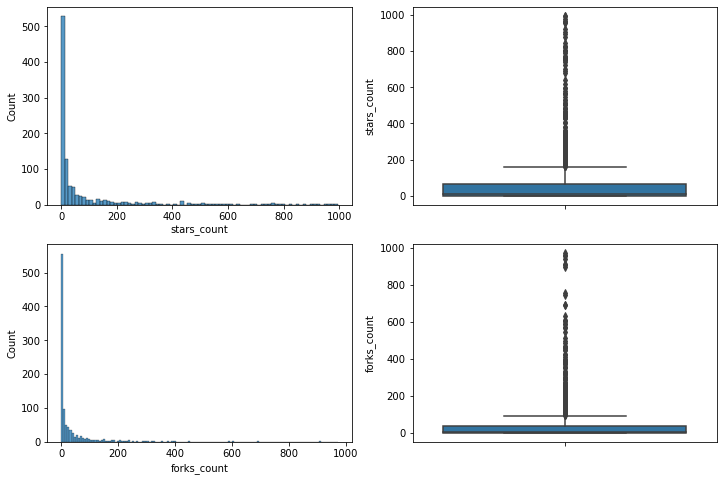

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(ax=axes[0, 0], data=githubdata, x='stars_count')
sns.boxplot(ax=axes[0, 1], data=githubdata, y='stars_count')
sns.histplot(ax=axes[1, 0], data=githubdata, x='forks_count')
sns.boxplot(ax=axes[1, 1], data=githubdata, y='forks_count')
plt.show()

数据缺失的处理
对于数据缺失的处理，我们观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:
1.将缺失部分剔除
2.用最高频率值来填补缺失值
3.通过属性的相关关系来填补缺失值
4.通过数据对象之间的相似性来填补缺失值
对于这个数据集，因为只有language这一个属性值有确实，我们分析来看，这种语言的种类只是上传者没有标记，并不能通过如stars_count,forks_count等属性推断出语言的种类，换句话说，language和其他属性没有必然的联系，没有模型可以建立。因此我们主要使用前两种方法来填补缺失值。

In [13]:
#策略1：直接去除
githubdata_dropna = githubdata.dropna()

# 缺失值处理策略2：用最高频率值来填补缺失值
githubdata_fillna_mode = githubdata.fillna(githubdata.mode().iloc[0])


# 对比新旧数据集的差异
print("缺失个数")
print(githubdata.isna().sum())
print("策略一后的数据集")
print(githubdata_dropna.isna().sum())
print("策略二后的数据集")
print(githubdata_fillna_mode.isna().sum())

缺失个数
repositories       0
stars_count        0
forks_count        0
issues_count       0
pull_requests      0
contributors       0
language         145
dtype: int64
策略一后的数据集
repositories     0
stars_count      0
forks_count      0
issues_count     0
pull_requests    0
contributors     0
language         0
dtype: int64
策略二后的数据集
repositories     0
stars_count      0
forks_count      0
issues_count     0
pull_requests    0
contributors     0
language         0
dtype: int64


# movies_dataset

同样，我们和处理第一个数据集一样，首先导入我们需要的数据库，我们和第一个数据集中导入的数据库是一样的，主要包括数据处理的核心库和用来可视化的一些库。

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute  import KNNImputer
from sklearn.linear_model import LinearRegression

本数据集movie_dataset包含来自好莱坞，宝莱坞，动漫等所有行业的20，000 +电影。主要包括
id: 电影的唯一ID
title: 电影的名称
storyline: 电影的简短描述
views: 每部电影的点击次数
downloads:每部电影的下载次数
IMDb-rating: 评分
appropriate_for: 适用于，有R-rated, PG-13等等级
language: 语言
industry: 出版商
posted_date: 平台发布时间
release_date: 发行时间
runtime: 时间
director: 导演
writer:作家
使用pd.read_csv（）函数进行读写，需要注意的是我们要把路径写对（路径前面记得加引号),数据集太大，我们可以分别展示两个数据集的头部，并且看一下数据集的大小。

In [18]:
path3 = './mine data/movie/movies_dataset.csv'
movie_data = pd.read_csv(path3)
#展示头部
print(movie_data.head())

#展示大小
print(movie_data.shape)
#展示数据类型
print(type(movie_data))

   Unnamed: 0  IMDb-rating appropriate_for      director downloads      id  \
0           0          4.8               R     John Swab       304  372092   
1           1          6.4           TV-PG   Paul Ziller        73  372091   
2           2          5.2               R  Ben Wheatley     1,427  343381   
3           3          8.1             NaN  Venky Atluri     1,549  372090   
4           4          4.6             NaN  Shaji Kailas       657  372089   

              industry       language   posted_date release_date  run_time  \
0  Hollywood / English        English  20 Feb, 2023  Jan 28 2023       105   
1  Hollywood / English        English  20 Feb, 2023  Feb 05 2023        84   
2  Hollywood / English  English,Hindi  20 Apr, 2021  Jun 18 2021  1h 47min   
3            Tollywood          Hindi  20 Feb, 2023  Feb 17 2023       139   
4            Tollywood          Hindi  20 Feb, 2023  Jan 26 2023       122   

                                           storyline  \
0  Doc

# 数据摘要和数据可视化

数据摘要部分我们对标称属性，给出每个可能取值的频数，对数值属性，给出5数概括及缺失值的个数。，在这个文件中，标称属性appropriate_for，director,language，industry等这里经过查询python中的函数，我们可以使用python中的value_counts()函数直接进行统计。数值属性包括IMD-rating,downlaod和views属性，针对这些属性我们利用describe函数进行5数概括，以及使用isnull()和sum()函数进行统计。

In [23]:
print(movie_data.isnull().sum())

Unnamed: 0            0
IMDb-rating         841
appropriate_for    9476
director           1938
downloads             1
id                    0
industry              1
language            542
posted_date           1
release_date          1
run_time           1768
storyline          1701
title                 1
views                 1
writer             2192
dtype: int64


In [20]:
print('appropriate_for统计量')
print(movie_data['appropriate_for'].value_counts())

print('director统计量')
print(movie_data['director'].value_counts())

print('language统计量')
print(movie_data['language'].value_counts())

print('industry统计量')
print(movie_data['industry'].value_counts())


appropriate_for统计量
R                 4384
Not Rated         2142
PG-13             1968
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
18+                  1
Name: appropriate_for, dtype: int64
director统计量
Venky Atluri                                  405
Simone Stock                                  403
Xavier Manrique                               403
John Swab                                     205
Neil Jordan                                   205
                                             ... 
Agnieszka Smoczynska                            1
Dylan Thomas Ellis                              1
Sunil Thakur, Sunil Dhawan, Shivani Thakur      1


对于数值属性，我们先用describle()函数进行统计一下

In [21]:
movie_data.describe()

,Unnamed: 0,IMDb-rating,id
count,20548.000000,19707.000000,20548.000000
mean,10273.500000,5.762151,222351.199776
std,5931.841001,1.374041,138422.327931
min,0.000000,1.100000,1.000000
25%,5136.750000,4.800000,96122.250000
50%,10273.500000,5.700000,264457.500000
75%,15410.250000,6.600000,354561.250000
max,20547.000000,9.900000,372092.000000


我们在这里发现，这个函数只统计出了unname:0,IMDb_rating,id这三个属性的五数概括，猜测原因是原先的数据集中格式有一些问题，经过测试，确实如此，这个数据集中有些看似是数字的，但是存储形式是字符串，所以我们要进行一步转化，这里我们使用to_numeric()函数将字符转换成数字，但是在这个过程中又遇到了问题，因为超过四位数的数字如1,258这种会有‘，’的出现，所以我们需要将逗号去掉，用str.replace(',','')来将其进行替换。由于这几个过程比较相似，就以downloads为例展示。

In [25]:
downdata=movie_data['downloads']
downdatanum=pd.to_numeric(downdata.str.replace(',',''))
print(downdatanum.describe())

count     20547.000000
mean      10795.238916
std       23716.181987
min           0.000000
25%         855.500000
50%        2716.000000
75%       10070.000000
max      391272.000000
Name: downloads, dtype: float64


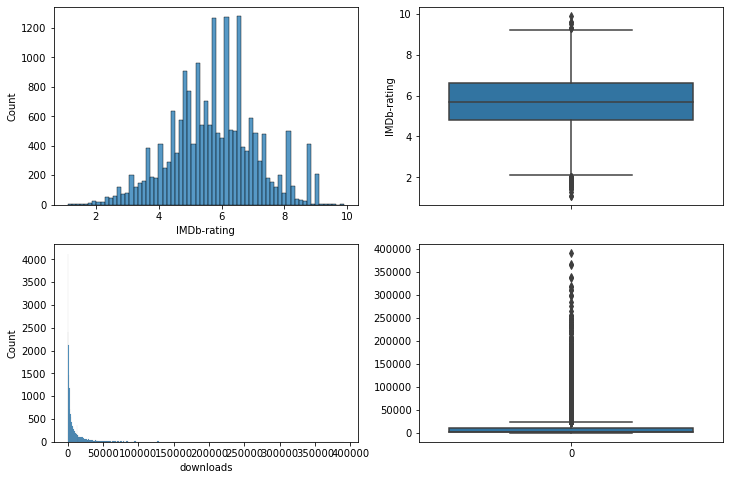

In [27]:
fig1, axes1 = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(ax=axes1[0, 0], data=movie_data, x='IMDb-rating')
sns.boxplot(ax=axes1[0, 1], data=movie_data, y='IMDb-rating')
sns.histplot(ax=axes1[1, 0], data=downdatanum, )
sns.boxplot(ax=axes1[1, 1], data=downdatanum, )
plt.show()

# 数据缺失处理

数据缺失的处理 对于数据缺失的处理，我们观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理: 1.将缺失部分剔除 2.用最高频率值来填补缺失值 3.通过属性的相关关系来填补缺失值 4.通过数据对象之间的相似性来填补缺失值 对于这个数据集，前两种方法是肯定可以使用的，另外，我们也可以认为电影的下载量越高，电影的评价越高，所以我们可以它们之间的相关关系来填补空缺值。

In [29]:
#策略1 缺失部分剔除
movie_data_dropna = movie_data.dropna()

#策略2 用最高频率值来填补缺失值
movie_data_fillna_mode = movie_data.fillna(movie_data.mode().iloc[0])

#展示前后变化
# 对比新旧数据集的差异
print("缺失个数")
print(movie_data.isna().sum())
print("策略一后的数据集")
print(movie_data_dropna.isna().sum())
print("策略二后的数据集")
print(movie_data_fillna_mode.isna().sum())

缺失个数
Unnamed: 0            0
IMDb-rating         841
appropriate_for    9476
director           1938
downloads             1
id                    0
industry              1
language            542
posted_date           1
release_date          1
run_time           1768
storyline          1701
title                 1
views                 1
writer             2192
dtype: int64
策略一后的数据集
Unnamed: 0         0
IMDb-rating        0
appropriate_for    0
director           0
downloads          0
id                 0
industry           0
language           0
posted_date        0
release_date       0
run_time           0
storyline          0
title              0
views              0
writer             0
dtype: int64
策略二后的数据集
Unnamed: 0         0
IMDb-rating        0
appropriate_for    0
director           0
downloads          0
id                 0
industry           0
language           0
posted_date        0
release_date       0
run_time           0
storyline          0
title              0
vie

第三中策略我们只针对downloads属性和IMDb-rating属性，我们使用线性回归模型对两个变量之间的关系进行模拟。

In [34]:
s1=movie_data['downloads']
s2=movie_data['IMDb-rating']
s3=s1.tolist()
s4=s2.tolist()
print(type(s1))
print(s1.shape)
print(s2.shape)

data1=train1[['downloads','IMDb-rating']]
print(type(data1))
print(type(data1['downloads']))
print(type(data1['IMDb-rating']))
data_pred = data1[np.isnan(data1['IMDb-rating'])]
known_price=data1[data1.(IMDb-rating).notnull()].values
y = known_price[:, 0] 
x = known_price[:, 1:]  
line_reg = LinearRegression()
line_reg.fit(x, y)
data_pred['IMDb-rating'] = line_reg.predict(data_pred['downloads'].values.reshape(-1, 1))
#print("-----test-----")
#print(data_pred['price'].type)
data1.loc[(data1.price.isnull()), 'IMDb-rating'] = data_pred['IMDb-rating']
#print("-----test-----")
#print(data1.loc[(data1.price.isnull()), 'price'])
print(data1.shape)
print(data1.isnull().sum())

<class 'pandas.core.series.Series'>
(20548,)
(20548,)
downloads          0
IMDb-rating        0
